<a href="https://colab.research.google.com/github/Dimildizio/DS_course/blob/main/Neural_networks/Agents/HF_u2_3_class_tool_use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Agents That Use Code

This notebook is part of the [Hugging Face Agents Course](https://www.hf.co/learn/agents-course), a free Course from beginner to expert, where you learn to build Agents.

![Agents course share](https://huggingface.co/datasets/agents-course/course-images/resolve/main/en/communication/share.png)

## Let's install the dependencies and login to our HF account to access the Inference API

If you haven't installed `smolagents` yet, you can do so by running the following command:

In [ ]:
#!pip install smolagents
!pip install opentelemetry-sdk opentelemetry-exporter-otlp openinference-instrumentation-smolagents


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 32.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib_metadata 8.6.1
    Uninstalling importlib_metadata-8.6.1:
      Successfully uninstalled importlib_metadata-8.6.1
  Attempting uninstall: opentelemetry-api
    Found existing installation: opentelemetry-api 1.16.0
    Uninstalling opentelemetry-api-1.16.0:
      Successfully uninstalled opentelemetry-api-1.16.0
  Attempting uninstall: opentelemetry-se

In [ ]:

import os
import base64
from google.colab import userdata

LANGFUSE_PUBLIC_KEY=userdata.get("LANGFUSE_PUBLIC_KEY")
LANGFUSE_SECRET_KEY=userdata.get("LANGFUSE_SECRET_KEY")
LANGFUSE_AUTH=base64.b64encode(f"{LANGFUSE_PUBLIC_KEY}:{LANGFUSE_SECRET_KEY}".encode()).decode()

#os.environ["OTEL_EXPORTER_OTLP_ENDPOINT"] = "https://cloud.langfuse.com/api/public/otel" # EU data region
os.environ["OTEL_EXPORTER_OTLP_ENDPOINT"] = "https://us.cloud.langfuse.com/api/public/otel" # US data region
os.environ["OTEL_EXPORTER_OTLP_HEADERS"] = f"Authorization=Basic {LANGFUSE_AUTH}"

In [ ]:
from opentelemetry.sdk.trace import TracerProvider

from openinference.instrumentation.smolagents import SmolagentsInstrumentor
from opentelemetry.exporter.otlp.proto.http.trace_exporter import OTLPSpanExporter
from opentelemetry.sdk.trace.export import SimpleSpanProcessor

trace_provider = TracerProvider()
trace_provider.add_span_processor(SimpleSpanProcessor(OTLPSpanExporter()))

SmolagentsInstrumentor().instrument(tracer_provider=trace_provider)

Let's also login to the Hugging Face Hub to have access to the Inference API.

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

## The `@tool` Decorator  

### Generating a tool that retrieves the highest-rated catering

Let's imagine that Alfred has already decided on the menu for the party, but now he needs help preparing food for such a large number of guests. To do so, he would like to hire a catering service and needs to identify the highest-rated options available. Alfred can leverage a tool to search for the best catering services in his area.

Below is an example of how Alfred can use the `@tool` decorator to make this happen:

In [ ]:
from smolagents import CodeAgent, HfApiModel, tool

# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service


agent = CodeAgent(tools=[catering_service_tool], model=HfApiModel())

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(highest_rated_catering_service)                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 0: Duration 0.73 seconds| Input tokens: 2,077 | Output tokens: 65]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = "Gotham Catering Co."                                                           
  final_answer(highest_rated_catering_service)                                                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Catering Co.

[Step 1: Duration 0.34 seconds| Input tokens: 4,324 | Output tokens: 148]

Gotham Catering Co.


## Defining a Tool as a Python Class  

### Generating a tool to generate ideas about the superhero-themed party

Alfred's party at the mansion is a **superhero-themed event**, but he needs some creative ideas to make it truly special. As a fantastic host, he wants to surprise the guests with a unique theme.

To do this, he can use an agent that generates superhero-themed party ideas based on a given category. This way, Alfred can find the perfect party theme to wow his guests.

In [ ]:
from smolagents import Tool, CodeAgent, HfApiModel

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")

# Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools=[party_theme_tool], model=HfApiModel())

# Run the agent to generate a party theme idea
result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  villain_party_theme = superhero_party_theme_generator(category="villain masquerade")                             
  print(f"The suggested villain masquerade party theme is: {villain_party_theme}")                                 
  final_answer(villain_party_theme)                                                                                
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
The suggested villain masquerade party theme is: Gotham Rogues' Ball: A mysterious masquerade where guests dress as
classic Batman villains.

Out - Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

[Step 0: Duration 5.71 seconds| Input tokens: 2,113 | Output tokens: 86]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.


## Sharing a Tool to the Hub

Sharing your custom tool with the community is easy! Simply upload it to your Hugging Face account using the `push_to_hub()` method.

For instance, Alfred can share his `catering_service_tool` to help others find the best catering services in Gotham. Here's how to do it:

In [ ]:
party_theme_tool.push_to_hub("{your_username}/catering_service_tool", token="<YOUR_HUGGINGFACEHUB_API_TOKEN>")

## Importing a Tool from the Hub

You can easily import tools created by other users using the `load_tool()` function. For example, Alfred might want to generate a promotional image for the party using AI. Instead of building a tool from scratch, he can leverage a predefined one from the community:

tool.py:   0%|          | 0.00/635 [00:00<?, ?B/s]

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.                 │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "A luxurious superhero-themed party at Wayne Manor, featuring made-up superheros in high-res,           
  photorealistic style. The party is filled with expensive decor, delicious food, and energetic guests. The scene  
  captures the essence of luxury and excitement."                                                                  
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x78A891474750>

[Step 0: Duration 25.53 seconds| Input tokens: 2,107 | Output tokens: 108]

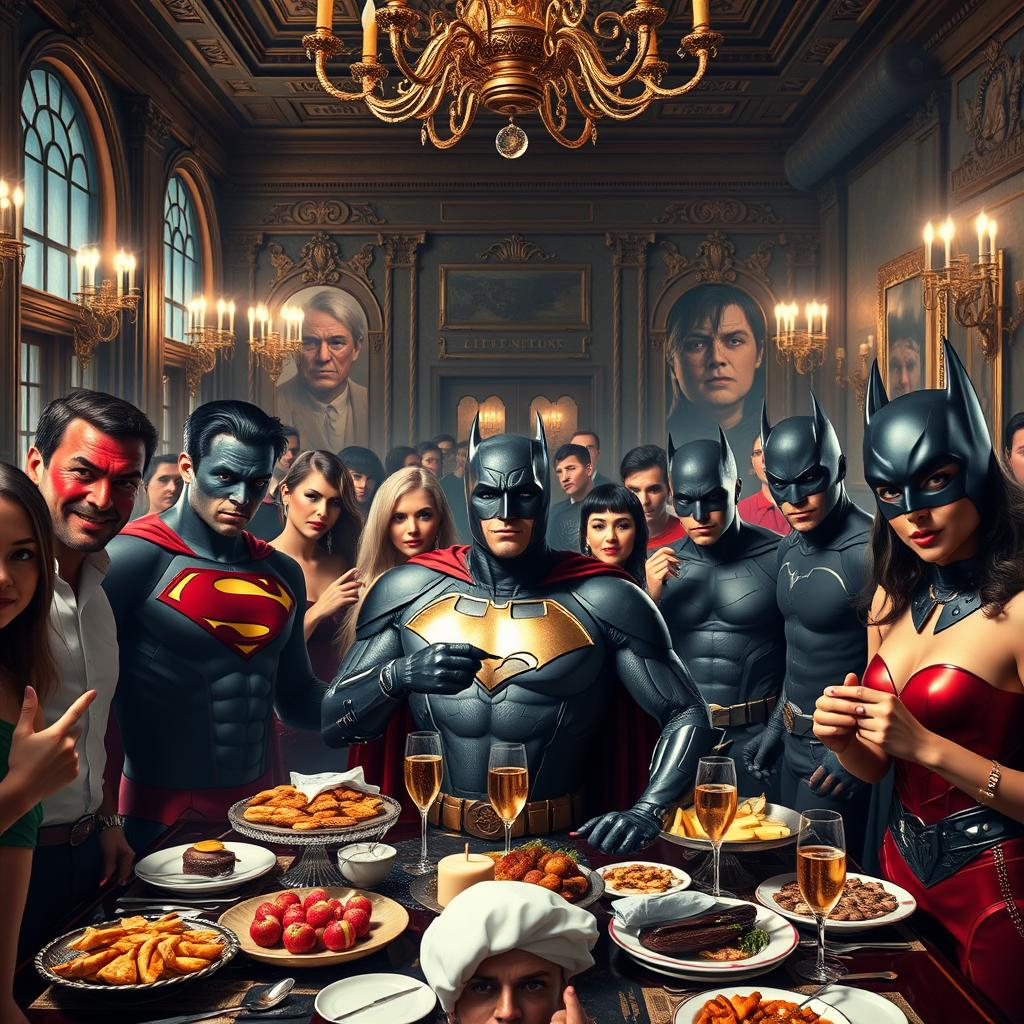

In [ ]:
from smolagents import load_tool, CodeAgent, HfApiModel

image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=HfApiModel()
)

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate a topdown view sprite for a dnd fantasy rpg. The camera is directly above the character. The hero has  │
│ a sword and a shield. and batman ears                                                                           │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "High-res, photorealistic topdown view sprite of a fantasy RPG hero. The character has a sword in one   
  hand and a shield in the other hand. The hero also has Batman ears."                                             
  sprite = image_generator(prompt=prompt)                                                                          
  final_answer(sprite)                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x78A8C61BB0D0>

[Step 0: Duration 18.24 seconds| Input tokens: 2,123 | Output tokens: 95]

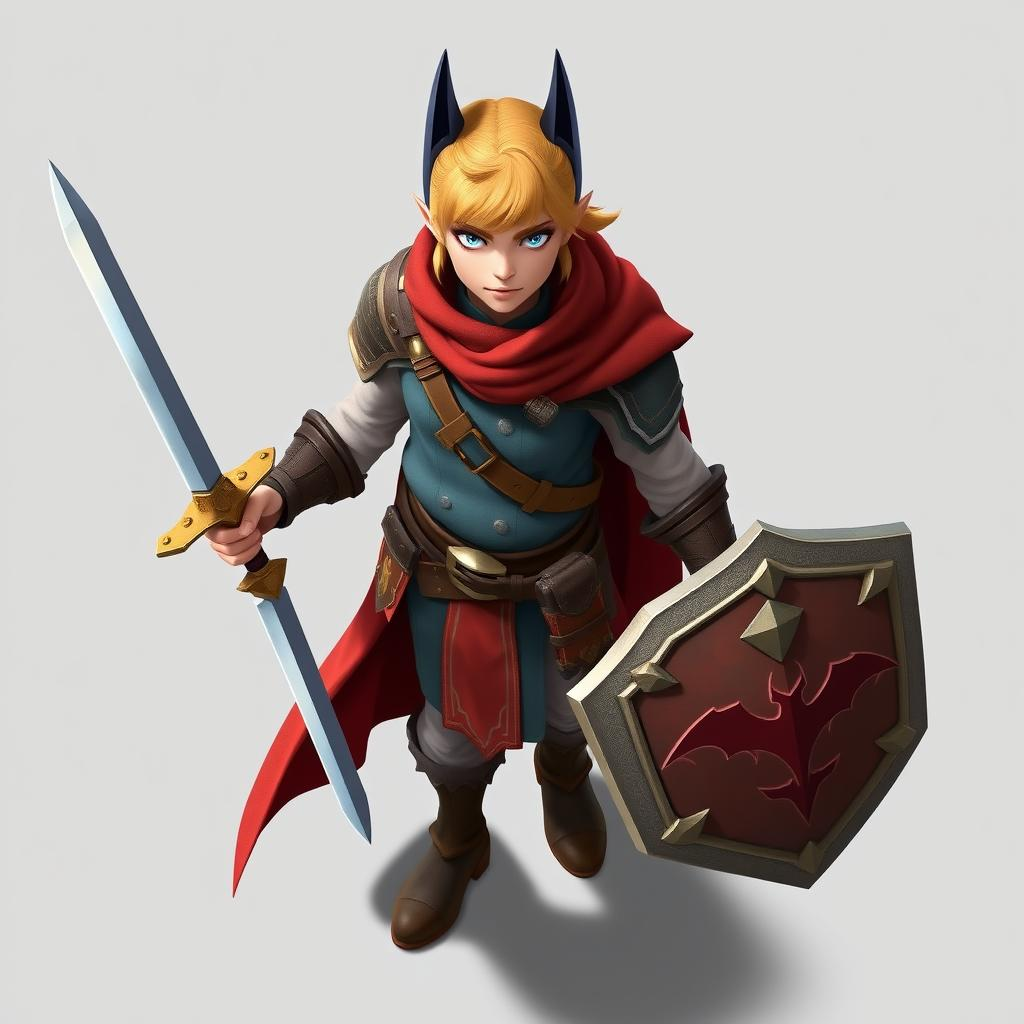

In [ ]:

agent.run("Generate a topdown view sprite for a dnd fantasy rpg. The camera is directly above the character. The hero has a sword and a shield. and batman ears")

## Importing a Hugging Face Space as a Tool

You can also import a HF Space as a tool using `Tool.from_space()`. This opens up possibilities for integrating with thousands of spaces from the community for tasks from image generation to data analysis.

The tool will connect with the spaces Gradio backend using the `gradio_client`, so make sure to install it via `pip` if you don't have it already. For the party, Alfred can also use a HF Space directly for the generation of the previous annoucement AI-generated image. Let's build it!

In [ ]:
!pip install gradio_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
from smolagents import CodeAgent, HfApiModel, Tool

image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

model = HfApiModel("Qwen/Qwen2.5-Coder-32B-Instruct")

agent = CodeAgent(tools=[image_generation_tool], model=model)

agent.run(
    "Improve this prompt, then generate an image of it.",
    additional_args={'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}
)

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Improve this prompt, then generate an image of it.                                                              │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}.      │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  improved_prompt = "A grand superhero-themed party at Wayne Manor, filled with dazzling lights and colorful       
  banners. Alfred is overseeing the luxurious gala with a warm and welcoming smile, wearing his traditional        
  butler attire. The party is bustling with guests dressed as iconic superheroes and heroines, engaging in fun     
  activities and enjoying delicious food and drinks. Decorations, including banners, balloons, and intricately     
  designed backdrops, reflect the superhero theme, and Batman-themed elements can be found throughout the venue.   
  The atmosphere is electric with excitement and anticipation."                                                    
  print(improved_prompt)                                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
A grand superhero-themed party at Wayne Manor, filled with dazzling lights and colorful banners. Alfred is 
overseeing the luxurious gala with a warm and welcoming smile, wearing his traditional butler attire. The party is 
bustling with guests dressed as iconic superheroes and heroines, engaging in fun activities and enjoying delicious 
food and drinks. Decorations, including banners, balloons, and intricately designed backdrops, reflect the 
superhero theme, and Batman-themed elements can be found throughout the venue. The atmosphere is electric with 
excitement and anticipation.

Out: None

[Step 0: Duration 13.08 seconds| Input tokens: 2,104 | Output tokens: 151]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  image_generator(prompt=improved_prompt)                                                                          
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: /tmp/gradio/6504c75565bf652bd88b967aa4da8b1ccde389f29555712fd1bbc439eb06fc9f/image.webp

[Step 1: Duration 11.12 seconds| Input tokens: 4,639 | Output tokens: 198]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("/tmp/gradio/6504c75565bf652bd88b967aa4da8b1ccde389f29555712fd1bbc439eb06fc9f/image.webp")          
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: /tmp/gradio/6504c75565bf652bd88b967aa4da8b1ccde389f29555712fd1bbc439eb06fc9f/image.webp

[Step 2: Duration 5.49 seconds| Input tokens: 7,353 | Output tokens: 292]

'/tmp/gradio/6504c75565bf652bd88b967aa4da8b1ccde389f29555712fd1bbc439eb06fc9f/image.webp'

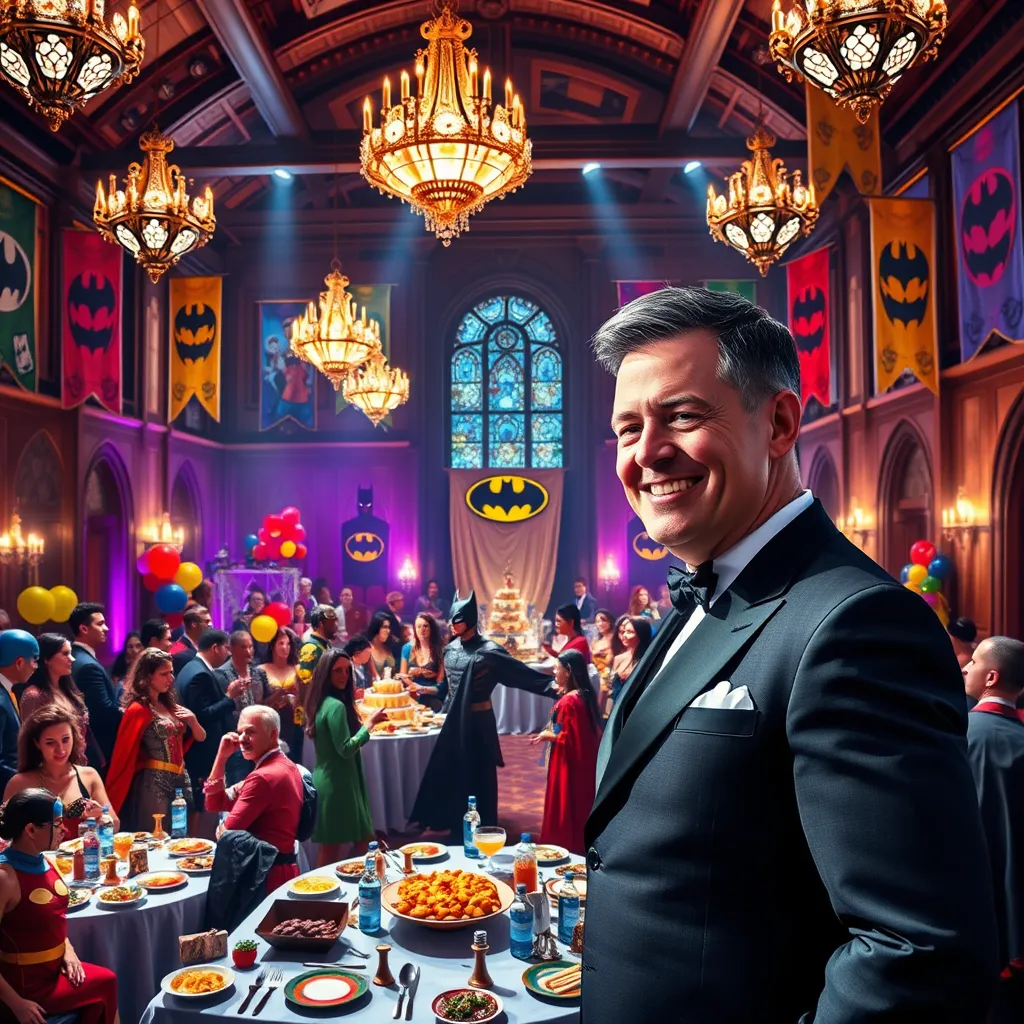

In [ ]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt

image_path = '/tmp/gradio/6504c75565bf652bd88b967aa4da8b1ccde389f29555712fd1bbc439eb06fc9f/image.webp'
img = PILImage.open(image_path)
img

## Importing a LangChain Tool

These tools need a [SerpApi API Key](https://serpapi.com/).

You can easily load LangChain tools using the `Tool.from_langchain()` method. Alfred, ever the perfectionist, is preparing for a spectacular superhero night at Wayne Manor while the Waynes are away. To make sure every detail exceeds expectations, he taps into LangChain tools to find top-tier entertainment ideas.

By using `Tool.from_langchain()`, Alfred effortlessly adds advanced search functionalities to his smolagent, enabling him to discover exclusive party ideas and services with just a few commands.

Here's how he does it:

In [ ]:
!pip install langchain-community google-search-results  # installing langchain without a version? somebody loves risk

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 6.3 MB/s eta 0:00:00
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32009 sha256=7ab2b1eb85eea1622ed2f7369a476366946e50cae05836176d11434022ac2619
  Stored in directory: /root/.cache/pip/wheels/6e/42/3e/aeb691b02cb7175ec70e2da04b5658d4739d2b41e5f73cd06f
Successfully built google-search-results


In [ ]:
from google.colab import userdata
import os
os.environ["SERPAPI_API_KEY"] = userdata.get('SERPAPI_API_KEY')

In [ ]:
from langchain.agents import load_tools
from smolagents import CodeAgent, HfApiModel, Tool

search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])

agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for several luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for several luxury entertainment ideas for a superhero-themed event, such as live performances and       │
│ interactive experiences.                                                                                        │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment_search = search(query="luxury superhero-themed entertainment ideas")                        
  print(luxury_entertainment_search)                                                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
[' entity_type: related_questions.', 'Jun 11, 2019 - Awesome ideas for your next Superhero Party | Decorations | 
Food | Games | Activities | Toys | Costumes | Crafts. See more ideas about ...', "For Amazon's new series The Tick,
custom props and decor incorporated superhero nuances in a playful way.", 'Batman Birthday Party Candy Buffet Ideas
| Little Dimple Designs · Captain America Deluxe Boys Costume · Marvel Carnage Morphsuit Mens Costume.', 'LED 
Battery Operated Lights · Basket Filler · Superhero Mini Buttons (pins) · Fringed Door Curtains · Large Superhero 
Signs · Small Superhero Signs ...', 'Discover your inner superhero in our dress-up wardrobe and grab your favorite 
mask, cape, dress and accessories to let your hidden superpowers shine! They have it all and organized a perfect 
party experience in such a friendly and welcoming way, even with all my special game requirements.', "Our 
children's Superhero Party Entertainment includes a range of interactive games and activities, such as superhero 
training and bubble popping, musical games.", 'DIY Superhero Party Decorations from Dollar Tree under $40! Bash 
Besties · 16K views ; PRO 5 SPIDER-MAN Team || Help Everyone On Kid Spider ...', '100 pages of fun prints, 
pennants, cupcake wrappers, bottle labels, party hats, soda covers and everything in between.']

Out: None

[Step 0: Duration 28.45 seconds| Input tokens: 2,083 | Output tokens: 87]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment_search = search(query="luxury superhero-themed live performances and interactive            
  experiences")                                                                                                    
  print(luxury_entertainment_search)                                                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
[' entity_type: explore_universal.', "Take a stand alongside some of Marvel's mightiest heroes and villains during 
an action-packed, day-long extravaganza on select 5-night Western Caribbean and ...", 'Why Choose Our 
Superhero-Themed Events? ✔️ Interactive performances that engage and entertain. ✔️ Professional cosplayers for a 
realistic ...', 'Become a part of THE experience. You will smash villains as Hulk, fly as Iron Man, shoot energy 
beams with Vision, and scale buildings with Spidey!', 'Soar with the legendary themes from Superman, Batman, and 
Spiderman, and brace yourself for the heroic melodies from Avengers: Endgame and Captain America.', 'Learn where to
find Marvel on the Disney Destiny, setting sail in November 2025 with new ways to interact with the Marvel 
Universe.', 'Visit the ultimate MARVEL 4D experince! Meet the iconic heroes only at Madame Tussauds Hollywood! Step
right into action-packed fun in Los Angeles.', 'A fully immersive design with life-size scenes straight from the 
comic world. Rare, hand-drawn images of iconic heroes such as Spider-Man, Black Panther, ...', 'Set to be one of 
the highlights of Easter, the party presents live performances, laser shows and more; all in iconic One&Only Reethi
Rah style.', 'Some replicas of movie costumes and plastic statues of iron man suits, some flashy lights, some hokey
"interactive" (barely) displays. The travelling Marvel: ...', "Entertainment located in Avengers Campus at Disney 
California Adventure Park. Encounter some of Earth's Mightiest Heroes and watch them spring into action."]

Out: None

[Step 1: Duration 9.12 seconds| Input tokens: 4,634 | Output tokens: 175]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_ideas = [                                                                                                 
      "Visit Madame Tussauds Hollywood to meet iconic heroes and step into action-packed fun.",                    
      "Experience live performances and watch heroes in action at Avengers Campus at Disney California Adventure   
  Park.",                                                                                                          
      "Smash villains as Hulk, fly as Iron Man, shoot energy beams with Vision, and scale buildings as Spidey.",   
      "Enjoy interactive performances and laser shows on a 5-night Western Caribbean cruise on Disney Cruise       
  Line.",                                                                                                          
      "Step into a fully immersive design with life-size scenes from the comic world at the MARVEL 4D Experience   
  at Madame Tussauds Hollywood."                                                                                   
  ]                                                                                                                
                                                                                                                   
  final_answer(luxury_ideas)                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: ['Visit Madame Tussauds Hollywood to meet iconic heroes and step into action-packed fun.', 
'Experience live performances and watch heroes in action at Avengers Campus at Disney California Adventure Park.', 
'Smash villains as Hulk, fly as Iron Man, shoot energy beams with Vision, and scale buildings as Spidey.', 'Enjoy 
interactive performances and laser shows on a 5-night Western Caribbean cruise on Disney Cruise Line.', 'Step into 
a fully immersive design with life-size scenes from the comic world at the MARVEL 4D Experience at Madame Tussauds 
Hollywood.']

[Step 2: Duration 22.46 seconds| Input tokens: 7,701 | Output tokens: 530]

['Visit Madame Tussauds Hollywood to meet iconic heroes and step into action-packed fun.',
 'Experience live performances and watch heroes in action at Avengers Campus at Disney California Adventure Park.',
 'Smash villains as Hulk, fly as Iron Man, shoot energy beams with Vision, and scale buildings as Spidey.',
 'Enjoy interactive performances and laser shows on a 5-night Western Caribbean cruise on Disney Cruise Line.',
 'Step into a fully immersive design with life-size scenes from the comic world at the MARVEL 4D Experience at Madame Tussauds Hollywood.']

With this setup, Alfred can quickly discover luxurious entertainment options, ensuring Gotham's elite guests have an unforgettable experience. This tool helps him curate the perfect superhero-themed event for Wayne Manor! 🎉